window size is 2048
sample rate is 22050
time of audio is 23.4985941043
number of sampels is 518144
number of windows is 253
('step size in sampels is ', 512)
feature matrix shape is: (3, 1009)
('number of frames : ', 1009)


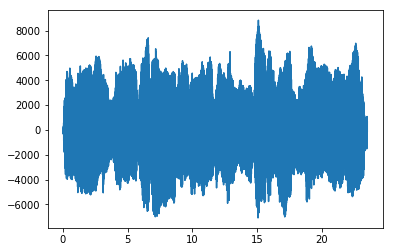

In [44]:
from scipy import signal
from scipy.io import wavfile #to read and write wavfiles
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np
import math
from matplotlib import style
from featureExtractionAspriya import short_term_feauture_extraction
from spectralFeatureExtractionAspriya import stSpectogram
from recordAudioWhilePloting import record
import pandas as pd

# style.use('ggplot')


def record():
    fs = 44100
    data = record(rate=fs, chunk_size=1024, record_seconds=10)
    return fs, data

def generate_timeArray():
    # gives a array containing numbers from 1 to number of samples
    timeArray = np.arange(len(data));
    timeArray = timeArray / float(fs)   #convert to seconds
    # timeArray = timeArray * 1000 #scale to milliseconds
    return timeArray

fs, data = wavfile.read('onsetDetectionData/sounds/realorgan3.wav')
length_of_audio = len(data) / float(fs)
window = 'hanning'

#time signal graph
timeArray = generate_timeArray()
plt.plot(timeArray, data)

#window_length_in_milliseconds = 92
#window_length_in_samples = (fs *window_length_in_milliseconds) / 1000
window_length_in_samples = 2048 #1024,2048,4096,8192
nperseg = window_length_in_samples
nfft = None #lenght of fft window. if zeor padding is neades, use a suitable power of 2 value here

print("window size is " + str(window_length_in_samples))
print("sample rate is " + str(fs))
print("time of audio is "+ str(length_of_audio))
print("number of sampels is "+ str(len(data)))
print("number of windows is "+ str(len(data)/window_length_in_samples))


step_size_in_samples = window_length_in_samples//4
print("step size in sampels is ", step_size_in_samples)

short_term_feautures = short_term_feauture_extraction(data, fs, window_length_in_samples, step_size_in_samples)
print ("feature matrix shape is: " +str(short_term_feautures.shape))

num_frames = len(short_term_feautures[0])
print("number of frames : ", num_frames)

('len short_term_features[1] : ', 1009)
('short_term_features[0] type : ', <type 'numpy.ndarray'>)


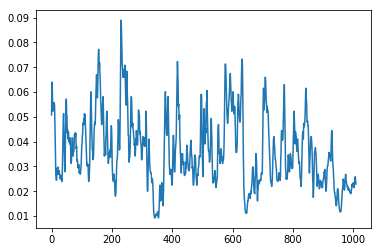

In [45]:
# Zero Crossing rate
plt.plot(short_term_feautures[0])
print("len short_term_features[1] : ", len(short_term_feautures[1]))
print("short_term_features[0] type : ", type(short_term_feautures[0]))

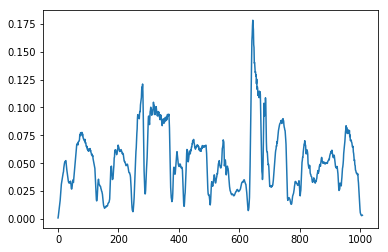

In [46]:
# energy
plt.plot(short_term_feautures[1])

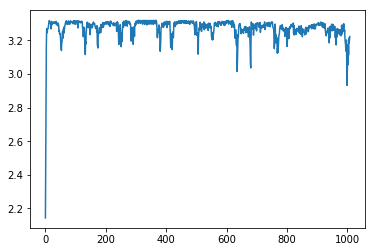

In [47]:
# energy entropy
plt.plot(short_term_feautures[2])

('freq axis shape: ', 1024)
('time axis shape: ', 1009)
('spectrogram shape: ', (1009, 1024))


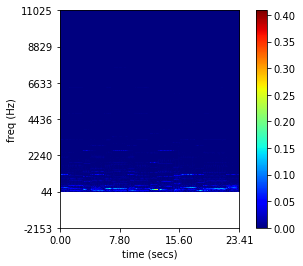

('spectogram length ', 1009)
('spectrogram shape ', (1009, 1024))


In [48]:
specgram, TimeAxis, FreqAxis = stSpectogram(data, fs, window_length_in_samples, step_size_in_samples, True)
# print("spectrogram is: ",  specgram)
print("spectogram length ", len(specgram))
print("spectrogram shape ", specgram.shape)

In [49]:
#.........................PANDAS (PREPARE DATA) ..............................

df = pd.read_csv('onsetDetectionData/ground-truth/realorgan3.txt', header=None)
df.columns = ['time']
df.head()

,time
0,0.13927
1,1.16095
2,3.01855
3,3.94735
4,5.82949


In [50]:
crnt_fram = 1
fram_pairs = []
while (crnt_fram <= len(short_term_feautures[0])):
    fram_pair1 = crnt_fram
    fram_pair2 = crnt_fram + 5
    if(fram_pair2 <= len(short_term_feautures[0])):
        fram_pairs.append([fram_pair1, fram_pair2])
    
    crnt_fram = crnt_fram + 1


df2 = pd.DataFrame(fram_pairs, columns=['frame 1', 'frame 2'])

df2['f1_ZCR'] = pd.Series(short_term_feautures[0][:num_frames-5])
df2['f2_ZCR'] = pd.Series(short_term_feautures[0][5:])

df2['f1_Energy'] = pd.Series(short_term_feautures[1][:num_frames-5])
df2['f2_Energy'] = pd.Series(short_term_feautures[1][5:])

df2['E change Ratio'] = df2.apply(lambda x: ((max(x['f1_Energy'] - x['f2_Energy'], 0))/max(x['f1_Energy'], x['f2_Energy'])) if (x['f1_Energy'] - x['f2_Energy']) >= 0 else 0, axis=1)

df2['f1_Energy Entropy'] = pd.Series(short_term_feautures[2][:num_frames-5])
df2['f2_Energy Entropy'] = pd.Series(short_term_feautures[2][5:])
df2.head(10)

,frame 1,frame 2,f1_ZCR,f2_ZCR,f1_Energy,f2_Energy,E change Ratio,f1_Energy Entropy,f2_Energy Entropy
0,1,6,0.050806,0.054714,0.000973,0.012056,0.0,2.143057,3.271118
1,2,7,0.062042,0.055691,0.002789,0.014286,0.0,2.507843,3.245817
2,3,8,0.063996,0.055691,0.005305,0.016636,0.0,2.895093,3.269334
3,4,9,0.057645,0.055691,0.007824,0.020641,0.0,3.163256,3.269383
4,5,10,0.052272,0.055691,0.009859,0.024010,0.0,3.264026,3.272078
5,6,11,0.054714,0.054714,0.012056,0.027511,0.0,3.271118,3.281905
6,7,12,0.055691,0.048852,0.014286,0.031205,0.0,3.245817,3.304170
7,8,13,0.055691,0.042501,0.016636,0.032920,0.0,3.269334,3.308349
8,9,14,0.055691,0.035173,0.020641,0.034840,0.0,3.269383,3.318823
9,10,15,0.055691,0.027357,0.024010,0.036580,0.0,3.272078,3.309803


In [51]:
print(short_term_feautures[1][:7])
print(df2.f2_Energy.describe())

[0.00097293 0.00278922 0.00530504 0.00782389 0.00985851 0.0120562
 0.01428551]
count    1004.000000
mean        0.053057
std         0.027875
min         0.002996
25%         0.032517
50%         0.049688
75%         0.066208
max         0.178255
Name: f2_Energy, dtype: float64


In [52]:

#................ PREPARING ONSET ARRAY (WETHER A ONSET DETECTED OR NOT AT THAT TIME INTERVAL) ..................
# Length of onset array should be number of frames - 5 (since the step size is "window_length_in_samples / 4")
crnt_fram = 1
onsetArray = []
frame1_time_array = []
window_length_in_seconds = window_length_in_samples / float(fs)
step_size_in_seconds = step_size_in_samples / float(fs)
print(" ")
print("-----------------------------------------------------------")
print("window length in seconds : ", window_length_in_seconds)
print("step size in seconds : ", step_size_in_seconds)

while (crnt_fram <= len(short_term_feautures[0]) - 5):
    t1 = window_length_in_seconds + ((crnt_fram - 1) * step_size_in_seconds )
    t2 = t1 + step_size_in_seconds
    #if t is in between t1 and t2, push 1 to onsetArray, else push 0.
    if(len(df[df.time > t1][df.time < t2]) > 0):
         onsetArray.append(1)
    else:
         onsetArray.append(0)
            
    frame1_time_array.append(t1)
    crnt_fram = crnt_fram + 1
    
df2['f1 end time'] = pd.Series(frame1_time_array)
df2['onset'] = pd.Series(onsetArray)
df2.head(500)

 
-----------------------------------------------------------
('window length in seconds : ', 0.09287981859410431)
('step size in seconds : ', 0.023219954648526078)


/home/ashan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,frame 1,frame 2,f1_ZCR,f2_ZCR,f1_Energy,f2_Energy,E change Ratio,f1_Energy Entropy,f2_Energy Entropy,f1 end time,onset
0,1,6,0.050806,0.054714,0.000973,0.012056,0.000000,2.143057,3.271118,0.092880,0
1,2,7,0.062042,0.055691,0.002789,0.014286,0.000000,2.507843,3.245817,0.116100,1
2,3,8,0.063996,0.055691,0.005305,0.016636,0.000000,2.895093,3.269334,0.139320,0
3,4,9,0.057645,0.055691,0.007824,0.020641,0.000000,3.163256,3.269383,0.162540,0
4,5,10,0.052272,0.055691,0.009859,0.024010,0.000000,3.264026,3.272078,0.185760,0
5,6,11,0.054714,0.054714,0.012056,0.027511,0.000000,3.271118,3.281905,0.208980,0
6,7,12,0.055691,0.048852,0.014286,0.031205,0.000000,3.245817,3.304170,0.232200,0
7,8,13,0.055691,0.042501,0.016636,0.032920,0.000000,3.269334,3.308349,0.255420,0
8,9,14,0.055691,0.035173,0.020641,0.034840,0.000000,3.269383,3.318823,0.278639,0
9,10,15,0.055691,0.027357,0.024010,0.036580,0.000000,3.272078,3.309803,0.301859,0
